In [17]:
from bbcpy.load.srm_eeg import *
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

module_path = os.path.abspath(os.path.join('../../bbcpy_AutoML/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
subjects_info_path = '../local/metadata'
subject_group_path = list_all_files(subjects_info_path, pattern="*.json")

In [3]:
len(subject_group_path)

58

In [4]:
MBSRsubject_list = {}
Non_MBSRsubject_list = {}

for subject_id, Subject_info_path in subject_group_path.items():
        
    Subject_info_dict = load_session_metadata(Subject_info_path)
    
    if Subject_info_dict["Session_1"]["subject"]["MBSRsubject"]:
        MBSRsubject_list[subject_id] = {}
        for session_id, stats in Subject_info_dict.items():
            MBSRsubject_list[subject_id][session_id] = {}
            
            pvc_session_valid_LR = stats["valid_pvc"]["LR"]
            MBSRsubject_list[subject_id][session_id]["LR"] = pvc_session_valid_LR

            pvc_session_valid_2D = stats["valid_pvc"]["2D"]
            MBSRsubject_list[subject_id][session_id]["2D"] = pvc_session_valid_2D
    else : 
        Non_MBSRsubject_list[subject_id] = {}
        for session_id, stats in Subject_info_dict.items():
            Non_MBSRsubject_list[subject_id][session_id] = {}
            
            pvc_session_valid_LR = stats["valid_pvc"]["LR"]
            Non_MBSRsubject_list[subject_id][session_id]["LR"] = pvc_session_valid_LR

            pvc_session_valid_2D = stats["valid_pvc"]["2D"]
            Non_MBSRsubject_list[subject_id][session_id]["2D"] = pvc_session_valid_2D
        


In [5]:
pvc_subject_mean_LR = {}
pvc_subject_mean_2D = {}
pvc_subject_sessions_LR = {}
pvc_subject_sessions_2D = {}

for subject_id, Subject_info_path in subject_group_path.items():
    
    pvc_subject_mean_LR[subject_id] = {}
    pvc_subject_sessions_LR[subject_id] = {}
    pvc_subject_mean_2D[subject_id] = {}
    pvc_subject_sessions_2D[subject_id] = {}
    
    tmp_subject_LR = []
    tmp_subject_2D = []
    
    Subject_info_dict = load_session_metadata(Subject_info_path)

    for session_id, stats in Subject_info_dict.items():
        
        pvc_session_valid_LR = stats["valid_pvc"]["LR"]
        tmp_subject_LR.append(pvc_session_valid_LR)
        pvc_subject_sessions_LR[subject_id][session_id] = pvc_session_valid_LR
        pvc_subject_mean_LR[subject_id] = np.mean(np.array(tmp_subject_LR))
        pvc_session_valid_2D = stats["valid_pvc"]["2D"]
        tmp_subject_2D.append(pvc_session_valid_2D)
        pvc_subject_sessions_2D[subject_id][session_id] = pvc_session_valid_2D
        pvc_subject_mean_2D[subject_id] = np.mean(np.array(tmp_subject_2D))

In [6]:
print(list(MBSRsubject_list.keys()))

['S1', 'S15', 'S19', 'S2', 'S21', 'S22', 'S24', 'S27', 'S28', 'S29', 'S3', 'S32', 'S34', 'S35', 'S36', 'S38', 'S39', 'S4', 'S41', 'S42', 'S45', 'S5', 'S53', 'S54', 'S55', 'S57', 'S58', 'S62', 'S7']


In [7]:
print(list(Non_MBSRsubject_list.keys()))

['S10', 'S11', 'S12', 'S13', 'S14', 'S16', 'S17', 'S18', 'S20', 'S23', 'S25', 'S26', 'S30', 'S31', 'S33', 'S40', 'S43', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52', 'S56', 'S6', 'S60', 'S61', 'S8', 'S9']


In [8]:

def calculate_pvc_task(pvc_subject_mean, task_name):
    if task_name == "LR":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.8}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.7 <= v <= 0.8}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.7}
    elif task_name == "2D":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.5}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.4 <= v <= 0.5}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.4}
    
    
    
    # Sorting each category by their values
    sorted_category_1 = dict(sorted(category_1.items(), key=lambda item: item[1], reverse=True))
    sorted_category_2 = dict(sorted(category_2.items(), key=lambda item: item[1], reverse=True))
    sorted_category_3 = dict(sorted(category_3.items(), key=lambda item: item[1], reverse=True))
    
    C1_list = list(sorted_category_1.keys())
    print("C1_list", C1_list)
    C2_list = list(sorted_category_2.keys())
    print("C2_list", C2_list)
    C3_list = list(sorted_category_3.keys())
    print("C3_list", C3_list)


    return sorted_category_1, sorted_category_2, sorted_category_3

In [9]:
sorted_category_1, sorted_category_2, sorted_category_3 = calculate_pvc_task(pvc_subject_mean_LR, "LR")

C1_list ['S5', 'S60', 'S57', 'S39', 'S9', 'S49', 'S30', 'S51', 'S52', 'S8', 'S36', 'S20', 'S50', 'S4', 'S38', 'S2', 'S43', 'S28']
C2_list ['S29', 'S26', 'S23', 'S19', 'S53', 'S41', 'S35', 'S61', 'S45', 'S14', 'S15', 'S11', 'S25', 'S1']
C3_list ['S13', 'S10', 'S54', 'S32', 'S7', 'S58', 'S56', 'S48', 'S62', 'S34', 'S12', 'S33', 'S55', 'S22', 'S47', 'S16', 'S27', 'S18', 'S42', 'S31', 'S21', 'S24', 'S17', 'S6', 'S40', 'S3']


In [10]:
sorted_category_1

{'S5': 0.9390427637768063,
 'S60': 0.9332025720822756,
 'S57': 0.9223093934434088,
 'S39': 0.9171713910584071,
 'S9': 0.9063266399673366,
 'S49': 0.8873703600777402,
 'S30': 0.8817886047397722,
 'S51': 0.8796913127224126,
 'S52': 0.8796170889229786,
 'S8': 0.8609849244387362,
 'S36': 0.8591404123933674,
 'S20': 0.8576079625436867,
 'S50': 0.8483601593209387,
 'S4': 0.8468667271557153,
 'S38': 0.8270081225843736,
 'S2': 0.8174113666358952,
 'S43': 0.806518843632938,
 'S28': 0.8040477511554539}

In [11]:
len(pvc_subject_mean_LR)

58

In [12]:
len(pvc_subject_mean_2D)

58

In [13]:
def plot_boxplot_pvc(pvc_subject_sessions, pvc_subject_mean, task_name, title):
    # Sorting the data into the three categories
    
    if task_name == "LR":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.8}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.7 <= v <= 0.8}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.7}
    elif task_name == "2D":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.5}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.4 <= v <= 0.5}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.4}
    


    # Sorting each category by their values
    sorted_category_1 = dict(sorted(category_1.items(), key=lambda item: item[1], reverse=True))
    sorted_category_2 = dict(sorted(category_2.items(), key=lambda item: item[1], reverse=True))
    sorted_category_3 = dict(sorted(category_3.items(), key=lambda item: item[1], reverse=True))

    C1_list = list(sorted_category_1.keys())
    print("C1_list", C1_list)
    C2_list = list(sorted_category_2.keys())
    print("C2_list", C2_list)
    C3_list = list(sorted_category_3.keys())
    print("C3_list", C3_list)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots
    
    categories = [C1_list, C2_list, C3_list]
    category_labels = ['Category A', 'Category B', 'Category C']
    
    for i, (C_list, ax, category_label) in enumerate(zip(categories, axs, category_labels)):
        
        # Sample nested dictionary
        data= {key: pvc_subject_sessions[key] for key in C_list if key in pvc_subject_sessions}
    
        # Extract values for each subject
        all_values = [list(subject_data.values()) for subject_data in data.values()]
    
        # Calculate means and standard deviations
        means = [np.mean(values) for values in all_values]
        std_devs = [np.std(values) for values in all_values]
    
        # Plotting
        bp = ax.boxplot(all_values, vert=True, patch_artist=True, showfliers=False)
        ax.set_xticklabels(data.keys())
        ax.set_ylabel('percent valid correct (PVC)')
        ax.set_title(f'{title} - {category_label}')
    
        # Coloring boxes
        colors = ['#D0DBEE', '#C2C4E2', '#EED4E5', '#D1E2F7', '#D4E5DE'] * (len(all_values) // 5 + 1)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
    
        # Plot means as red diamonds
        ax.scatter(range(1, len(means) + 1), means, marker='D', color='red', s=60, zorder=5)
        
        # Display standard deviations
        for i, (mean, std_dev) in enumerate(zip(means, std_devs), start=1):
            ax.plot([i, i], [mean - std_dev, mean + std_dev], color='blue', lw=2.5, zorder=4)
        
    plt.tight_layout()
    plt.show()
    



In [14]:
import pandas as pd

df = pd.DataFrame(pvc_subject_sessions_LR.values(), index=pvc_subject_sessions_LR.keys()) 
df.to_csv (r'pvc_subject_sessions_LR.csv', index=True, header=True)

In [15]:
import pandas as pd

df = pd.DataFrame(pvc_subject_sessions_LR.keys(), index=pvc_subject_sessions_LR.values()) 
df.to_csv (r'pvc_subject_sessions_LR.csv', index=True, header=True)

In [ ]:

# Function to assign categories based on task and PVC values
def assign_category(pvc_values, task_name):
    categories = []
    for v in pvc_values:
        if task_name == "LR":
            if v > 0.8:
                categories.append(1)
            elif 0.7 <= v <= 0.8:
                categories.append(2)
            else:
                categories.append(3)
        elif task_name == "2D":
            if v > 0.5:
                categories.append(1)
            elif 0.4 <= v <= 0.5:
                categories.append(2)
            else:
                categories.append(3)
        else:
            categories.append(None)
    return categories

# Apply the category assignment to each session
task_name = "LR"  # Assuming the task name for this dataset
for col in pvc_data.columns[1:]:
    pvc_data[f'Category_{col}'] = assign_category(pvc_data[col], task_name)

# Defining the subject lists for MBSR and Non-MBSR subjects
MBSR_subject_list = [
    'S1', 'S15', 'S19', 'S2', 'S21', 'S22', 'S24', 'S27', 'S28', 'S29', 'S3',
    'S32', 'S34', 'S35', 'S36', 'S38', 'S39', 'S4', 'S41', 'S42', 'S45', 'S5',
    'S53', 'S54', 'S55', 'S57', 'S58', 'S62', 'S7'
]
Non_MBSR_subject_list = [
    'S10', 'S11', 'S12', 'S13', 'S14', 'S16', 'S17', 'S18', 'S20', 'S23',
    'S25', 'S26', 'S30', 'S31', 'S33', 'S40', 'S43', 'S47', 'S48', 'S49',
    'S50', 'S51', 'S52', 'S56', 'S6', 'S60', 'S61', 'S8', 'S9'
]

# Creating subplots for each category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Iterating over each category and plotting the boxplot
for i, category in enumerate(["A", "B", "C"]):
    # Extracting data for the current category
    category_cols = [col for col in pvc_data.columns if col.startswith(f'Category_') and pvc_data[col].eq(category).any()]
    category_data = pvc_data[['Unnamed: 0'] + category_cols].melt(id_vars='Unnamed: 0', value_vars=category_cols)
    
    # Filtering for relevant categories
    category_data = category_data[category_data['value'] == category]
    
    # Plotting
    sns.boxplot(x='variable', y='value', hue='Unnamed: 0', data=category_data, ax=axes[i])
    
    # Setting plot properties
    axes[i].set_title(f'Category {category} Box Plot')
    axes[i].set_xlabel('Session')
    axes[i].set_ylabel('PVC Value')
    axes[i].legend(title='Subject', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
pvc_subject_sessions_LR

{'S1': {'Session_1': 0.6395348837209303,
  'Session_10': 0.811965811965812,
  'Session_11': 0.7070707070707071,
  'Session_2': 0.6306306306306306,
  'Session_3': 0.6862745098039216,
  'Session_4': 0.8348623853211009,
  'Session_5': 0.7395833333333334,
  'Session_6': 0.6454545454545455,
  'Session_7': 0.8018018018018018,
  'Session_8': 0.6074766355140186,
  'Session_9': 0.6020408163265306},
 'S10': {'Session_1': 0.5862068965517241,
  'Session_10': 0.5972222222222222,
  'Session_11': 0.6129032258064516,
  'Session_2': 0.5396825396825397,
  'Session_3': 0.6619718309859155,
  'Session_4': 0.7560975609756098,
  'Session_5': 0.72,
  'Session_6': 0.734375,
  'Session_7': 0.6379310344827587,
  'Session_8': 0.6724137931034483,
  'Session_9': 0.6440677966101694},
 'S11': {'Session_1': 0.7142857142857143,
  'Session_10': 0.8103448275862069,
  'Session_11': 0.7474747474747475,
  'Session_2': 0.8380952380952381,
  'Session_3': 0.7920792079207921,
  'Session_4': 0.6788990825688074,
  'Session_5': 0.

C1_list ['S5', 'S60', 'S57', 'S39', 'S9', 'S49', 'S30', 'S51', 'S52', 'S8', 'S36', 'S20', 'S50', 'S4', 'S38', 'S2', 'S43', 'S28']
C2_list ['S29', 'S26', 'S23', 'S19', 'S53', 'S41', 'S35', 'S61', 'S45', 'S14', 'S15', 'S11', 'S25', 'S1']
C3_list ['S13', 'S10', 'S54', 'S32', 'S7', 'S58', 'S56', 'S48', 'S62', 'S34', 'S12', 'S33', 'S55', 'S22', 'S47', 'S16', 'S27', 'S18', 'S42', 'S31', 'S21', 'S24', 'S17', 'S6', 'S40', 'S3']


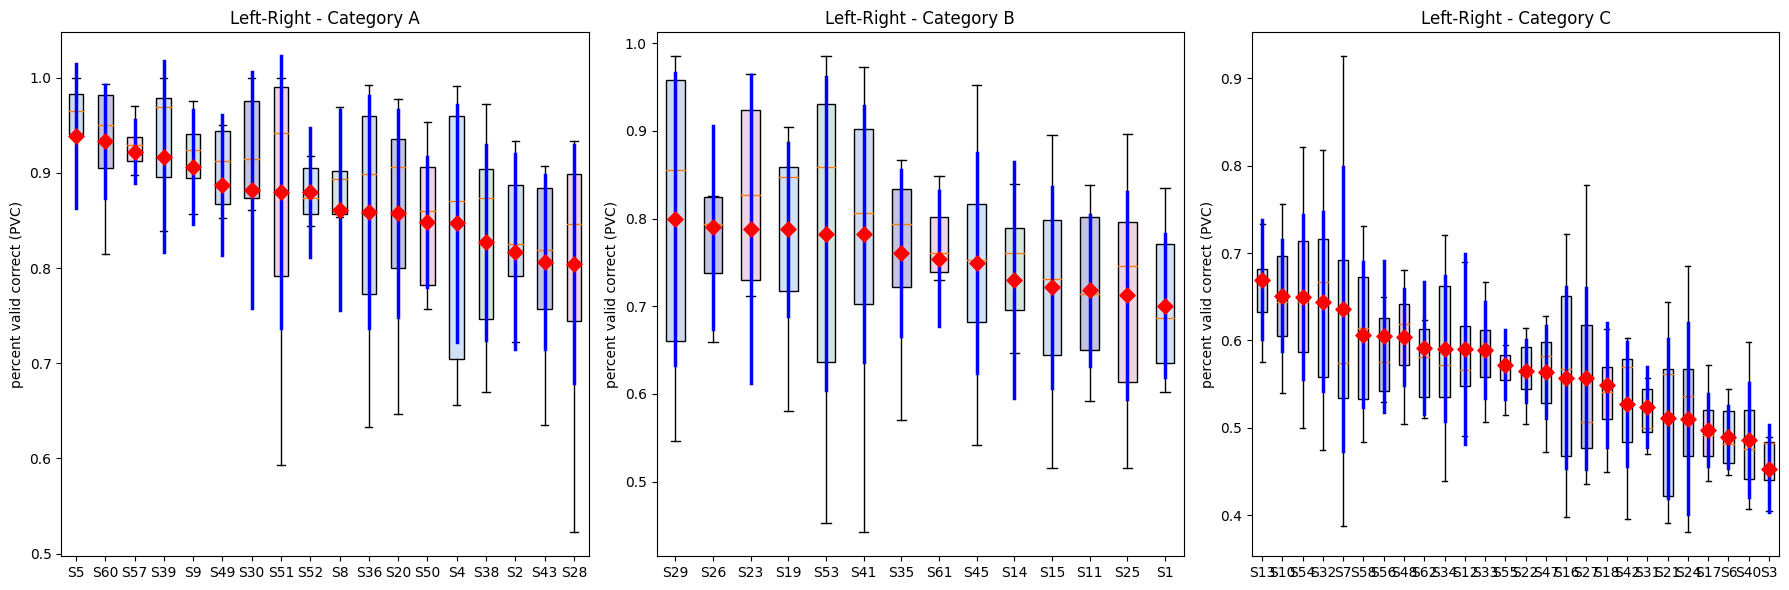

In [16]:
plot_boxplot_pvc(pvc_subject_sessions_LR, pvc_subject_mean_LR, "LR", "Task Left-Right (LR)")

In [ ]:
plot_boxplot_pvc(pvc_subject_sessions_2D, pvc_subject_mean_2D, "2D", "2D")

In [ ]:
# Sorting the data into the three categories
category_1 = {k: v for k, v in pvc_subject_mean_LR.items() if v > 0.7}
category_2 = {k: v for k, v in pvc_subject_mean_LR.items() if 0.6 <= v <= 0.7}
category_3 = {k: v for k, v in pvc_subject_mean_LR.items() if v < 0.6}

# Sorting each category by their values
sorted_category_1 = dict(sorted(category_1.items(), key=lambda item: item[1], reverse=True))
sorted_category_2 = dict(sorted(category_2.items(), key=lambda item: item[1], reverse=True))
sorted_category_3 = dict(sorted(category_3.items(), key=lambda item: item[1], reverse=True))

C1_list = list(sorted_category_1.keys())


# Sample nested dictionary
data = {key: pvc_subject_sessions_LR[key] for key in C1_list if key in pvc_subject_sessions_LR}

# Extract values for each subject
all_values = [list(subject_data.values()) for subject_data in data.values()]

# Calculate means and standard deviations
means = [np.mean(values) for values in all_values]
std_devs = [np.std(values) for values in all_values]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(all_values, vert=True, patch_artist=True, showfliers=False)
ax.set_xticklabels(data.keys())
ax.set_ylabel('percent valid correct (PVC)')
ax.set_title('Group 3')

# Coloring boxes
colors = ['#D0DBEE', '#C2C4E2', '#EED4E5', '#D1E2F7', '#D4E5DE'] * (len(all_values) // 5 + 1)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Plot means as red diamonds
ax.scatter(range(1, len(means) + 1), means, marker='D', color='red', s=60, zorder=5)

# Display standard deviations
for i, (mean, std_dev) in enumerate(zip(means, std_devs), start=1):
    ax.plot([i, i], [mean - std_dev, mean + std_dev], color='blue', lw=2.5, zorder=4)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
keys = list(sorted_category_1.keys())
values = list(sorted_category_1.values())

# Das Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.barh(keys, values, color='skyblue')
plt.xlabel('pvc score')
plt.ylabel('Subject id')
plt.title('Group 1 : best subjet performance ')
plt.gca().invert_yaxis()  # Sortiert die Balken von oben nach unten basierend auf den Werten
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
keys = list(sorted_category_2.keys())
values = list(sorted_category_2.values())

# Das Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.barh(keys, values, color='skyblue')
plt.xlabel('pvc score')
plt.ylabel('Subject id')
plt.title('Group 2 : best subjet performance ')
plt.gca().invert_yaxis()  # Sortiert die Balken von oben nach unten basierend auf den Werten
plt.show()